# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data collection and preprocessing

In [2]:
insurance_data = pd.read_csv("/content/insurance.csv")

In [3]:
#Displaying first five rows of the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Displaying last five rows of the dataset
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# Displaying total no. of rows and columns in a dataset
insurance_data.shape

(1338, 7)

In [6]:
#Displaying some stastistical measure of dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Displaying some info of a dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Checking null value in a datase
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# distribution of categorical data 
print(insurance_data['region'].value_counts())
print(insurance_data['smoker'].value_counts())
print(insurance_data['sex'].value_counts())


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
male      676
female    662
Name: sex, dtype: int64


In [21]:
# Encoding the categorical value to numerical value
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}, 'smoker':{'yes':0,'no':1}, 'sex':{'male':0,'female':1}}, inplace=True)

In [22]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Data analysis

In [23]:
correlation = insurance_data.corr()

<Axes: >

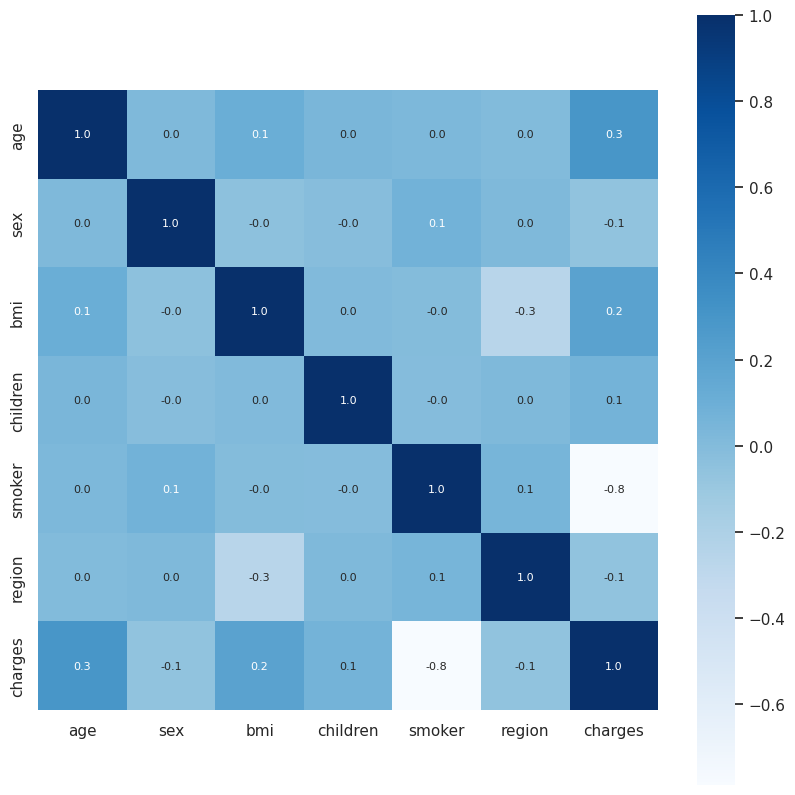

In [24]:
#constructing heatmap for analysis
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Figure size 800x800 with 0 Axes>

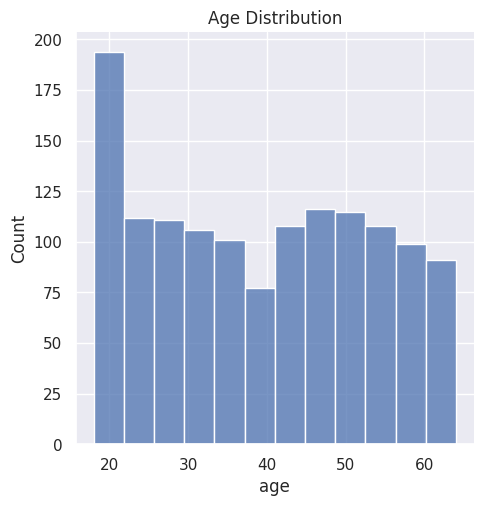

In [16]:
# distribution of age values
sns.set()
plt.figure(figsize=(8,8))
sns.displot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

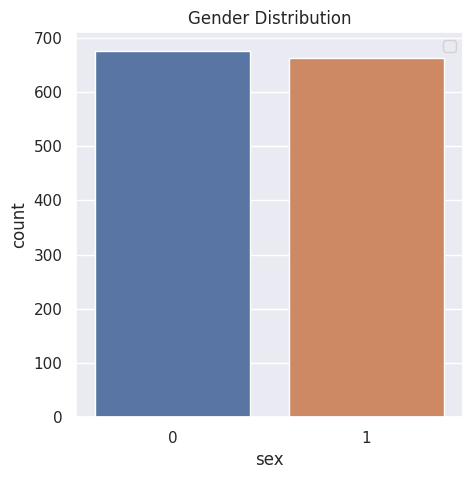

In [18]:
# distribution of gender 
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance_data)
plt.title("Gender Distribution")
plt.legend()
plt.show()

<Figure size 800x800 with 0 Axes>

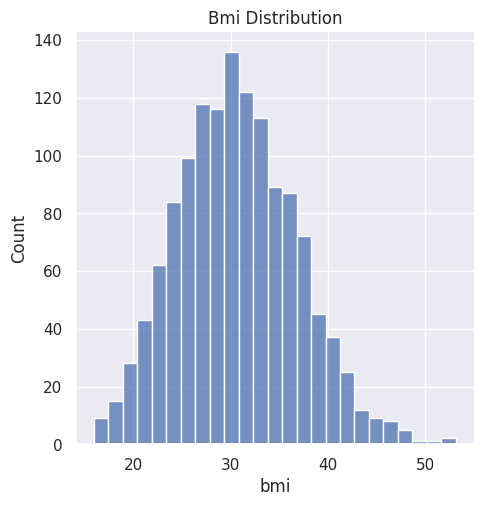

In [19]:
# distribution of bmi
sns.set()
plt.figure(figsize=(8,8))
sns.displot(insurance_data['bmi'])
plt.title("Bmi Distribution")
plt.show()

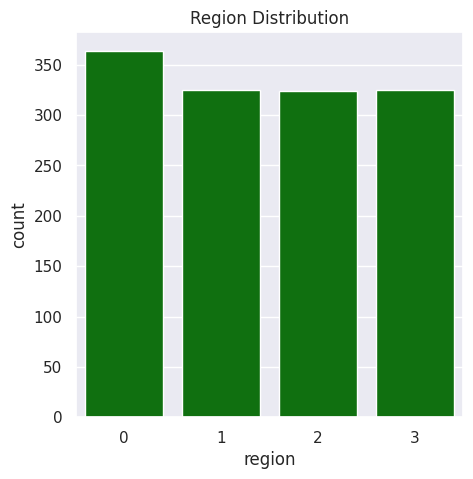

In [25]:
# distribution of region
plt.figure(figsize=(5,5))
sns.countplot(data=insurance_data, x='region', color='green')
plt.title("Region Distribution")
plt.show()

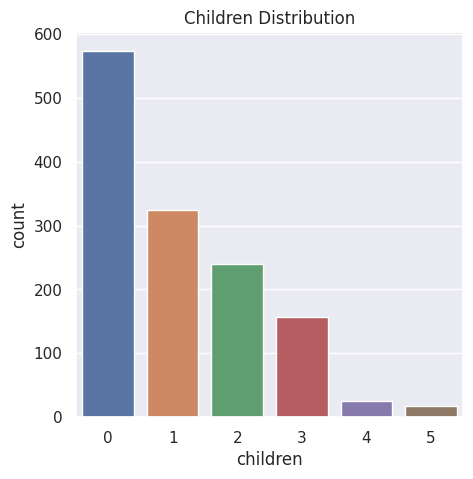

In [27]:
# distribution of children
plt.figure(figsize=(5,5))
sns.countplot(data=insurance_data, x='children')
plt.title("Children Distribution")
plt.show()

In [28]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

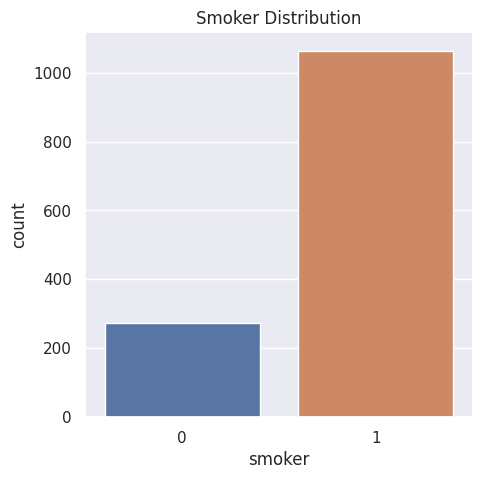

In [30]:
# distribution of smoker
plt.figure(figsize=(5,5))
sns.countplot(data=insurance_data, x='smoker')
plt.title("Smoker Distribution")
plt.show()

<Figure size 800x800 with 0 Axes>

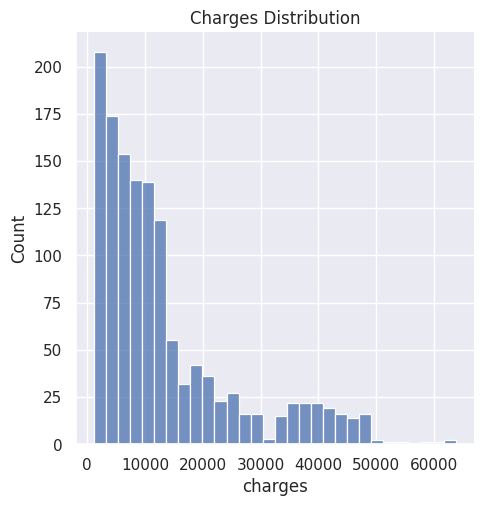

In [32]:
# distribution of charges values
plt.figure(figsize=(8,8))
sns.displot(insurance_data['charges'])
plt.title("Charges Distribution")
plt.show()

# Splitting target and features columns

In [33]:
X= insurance_data.drop(columns='charges', axis=1)
Y= insurance_data['charges']

In [34]:
print(X,Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into train test 

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Tranining

Here, we are using Linear Regression model

In [37]:
regressor = LinearRegression()

In [38]:
# training our data with the help of model
regressor.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation

In [39]:
# Prediction in a training data
X_train_prediction = regressor.predict(X_train)

In [40]:
# R squared error
error_score = metrics.r2_score(Y_train, X_train_prediction)
print("R Squared error :", error_score)

R Squared error : 0.751505643411174


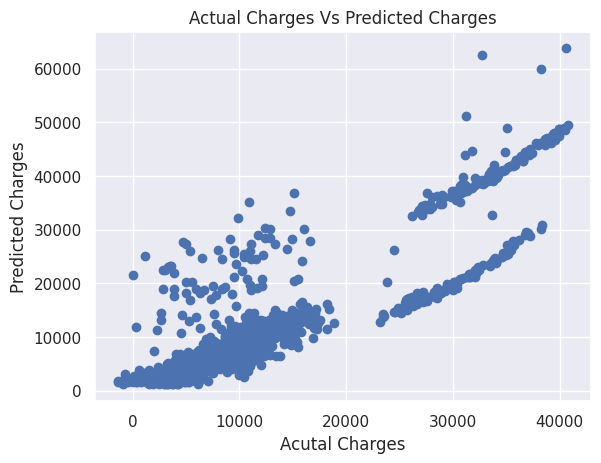

In [44]:
# Visualizing Acutal prices and predicted prices
plt.scatter(X_train_prediction, Y_train)
plt.ylabel("Predicted Charges")
plt.xlabel("Acutal Charges")
plt.title("Actual Charges Vs Predicted Charges")
plt.show()

In [45]:
# Prediction in a testing data
X_test_prediction = regressor.predict(X_test)

In [46]:
# R squared error
error_score = metrics.r2_score(Y_test, X_test_prediction)
print("R Squared error :", error_score)

R Squared error : 0.7447273869684076


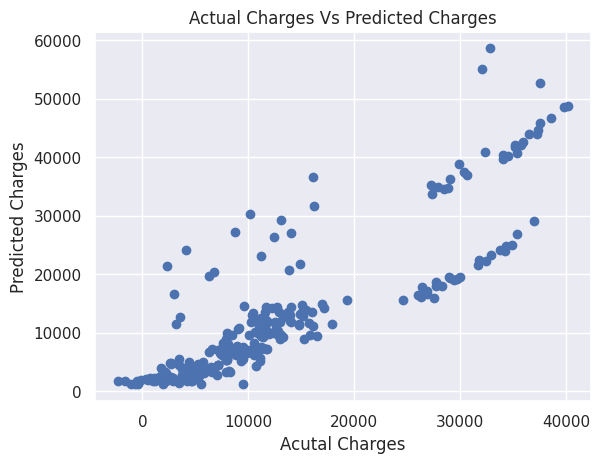

In [47]:
# Visualizing Acutal prices and predicted prices
plt.scatter(X_test_prediction, Y_test)
plt.ylabel("Predicted Charges")
plt.xlabel("Acutal Charges")
plt.title("Actual Charges Vs Predicted Charges")
plt.show()

# Building a predictive model

In [50]:
input_data = (23,0,34.4,0,1,1)

# Converting the input_data to numpy array
input_data_as_array = np.asarray(input_data)

#Reshaping the numpy array as we are doing for one instance
input_data_reshaped = input_data_as_array.reshape(1,-1)

#predicting 
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("The cost for the insurance is USD", prediction[0])

[4798.34244623]
The cost for the insurance is USD 4798.342446229956


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
